# Utilização básica do construtor de guias de onda

In [1]:
# módulo de controle simples de arrays
import numpy as np
# módulo de produção de gráficos
import matplotlib.pyplot as plt

# construção da janela computacional
l = np.linspace(-40.0, +40.0, 500); # lista de pontos da partição dos eixos x e y
X, Y = np.meshgrid(l,l);            # matriz de x e y dos pontos da malha de partição
Z = np.linspace(0.0, 2.0, 5);           # lista de pontos da partição do eixo z

# computação dos limites dos eixos
extremos = [
    l[0], l[-1],                    # extremos do eixo x
    l[0], l[-1]                     # extremos do eixo y
];

Para prosseguir instruiremos como caracterizar o meio óptico onde será simulada a propagação da luz, para tal importaremos o módulo `opticalMedium` no módulo `propagation`.

In [2]:
%cd -q ..
# importação do controle do meio óptico
from opticalField.propagation import opticalMedium

## Construção de guias de onda genéricos por `opticalMedium.waveGuide`

A construção de um guia de onda de geometria genérica foi implementada pelo construtor `opticalMedium.waveGuide()`.

> `opticalMedium.waveGuide(center, guideWaist, delta_n, z_i, z_f)`
>
>> returna um guia de onda (`waveGuide`) centrado na curva paramétrica definida por `center(z)` com raio dado por `guideWaist(z)` com `z`$\in[$`z_i`,`z_f`$]$ com `delta_n(X - x0, Y - y0, z)` -onde (`x0`, `y0`) é o centro do guia - de diferença ao índice de refração base.

a exemplo criaremos aqui um guia de onda centrado na hélice circular $(20\operatorname{cos}(\pi{z}),20\operatorname{sin}(\pi{z}),z)$ ($0 < z < 2$)com raio variando linearmente entre $10$ e $1$ com um índice de refração variando ao longo do guia quadraticamente com sua distância ao seu centro acrescido de um índice fixo.

In [9]:
WG = opticalMedium.waveGuide(
    center = lambda z: (20 * np.cos(np.pi * z), 20 * np.sin(np.pi * z)),
    guideWaist = lambda z: 10 - 9 * z / 2,
    delta_n = lambda X, Y, x0, y0, z:  1.0 + (X - x0)**2 + (Y - y0)**2,
    z_i = 0.0,
    z_f = 2.0
);

### Visualização do guia de onda

por ora iremos visualizar o guia através de alguns perfils transversais:

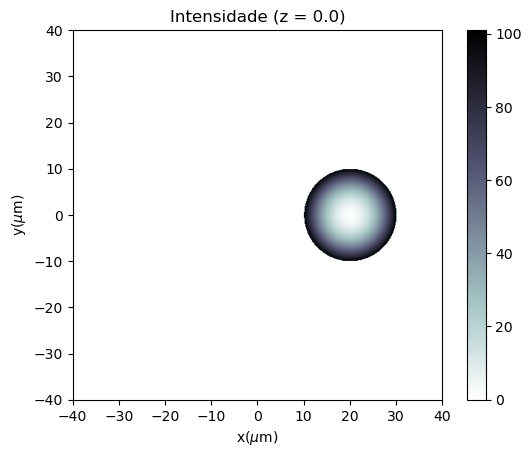

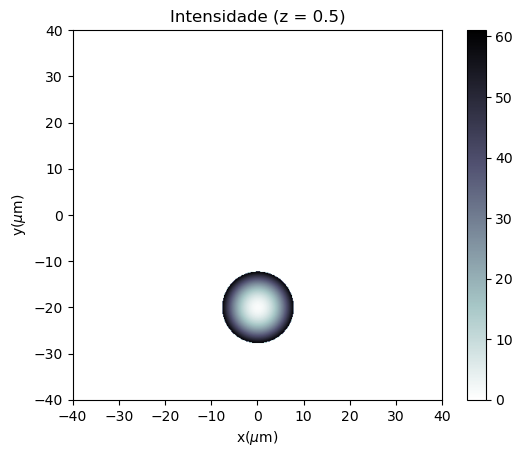

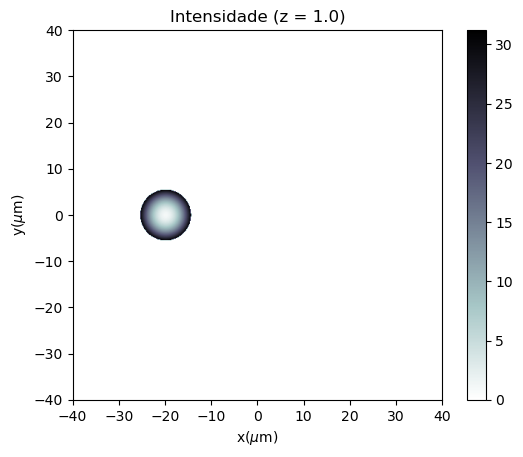

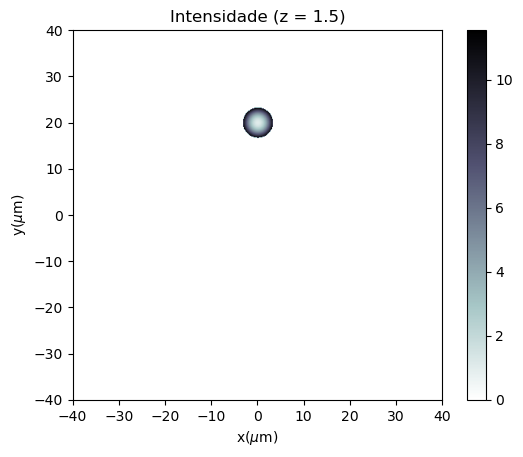

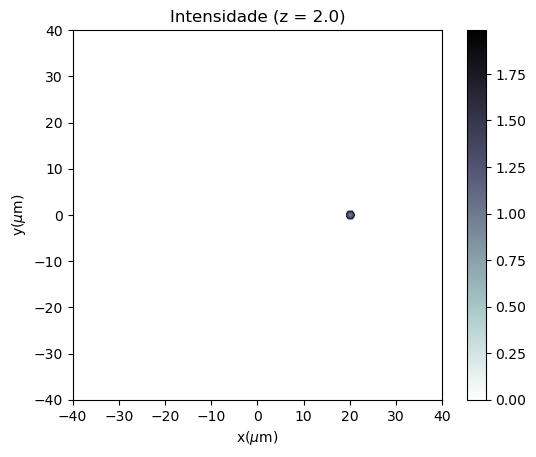

In [15]:
for z in Z:
    # criação de figuras para plotagem de imagem
    fig, ax = plt.subplots();

    # rotulação do título da figura
    ax.set_title(f'Intensidade (z = {z})');

    # rotulação dos eixos coordenados
    ax.set_xlabel('x($\mu$m)')
    ax.set_ylabel('y($\mu$m)')

    # geração de imagem do perfil do índice de refração ao longo do guia de onda
    imageIntensity = ax.imshow(
        np.zeros(X.shape) +
        WG.applyRefractiveIndex((X, Y), z),
        cmap = 'bone_r',                # define o mapa de cores
        extent = extremos               # define a extensão dos eixos x e y
    );
    fig.colorbar(imageIntensity);       # insere uma colorbar

### 

### Construção de guias de onda retos por `opticalMedium.straightWaveGuide`

A construção de um guia de onda reto foi implementada pelo construtor `opticalMedium.straightWaveguide()` onde a curva paramétrica que descreve o centro do guia não é passada como argumento (sendo substituida pelos parâmetrso `center_i` e `center_f` que corresponde às posições do centro em `z`$=$`z_i` e `z`$=$`z_f` respectivamente). A título de exemplo, criaremos abaixo um simples guia de onda reto.

In [11]:
strghtWG = opticalMedium.straightWaveguide(
    center_i = (-10.0, 0.0),
    center_f = (+10.0, 0.0),
    guideWaist = lambda z: 10.0,
    delta_n = lambda X,Y,x0,y0,z: 1.0,
    z_i = 0.0,
    z_f = 2.0
);

### Visualização do guia de onda

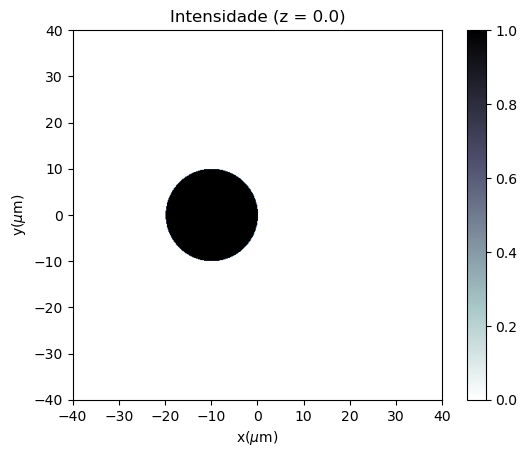

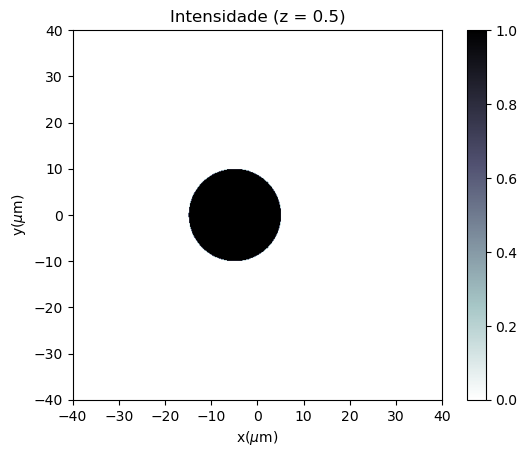

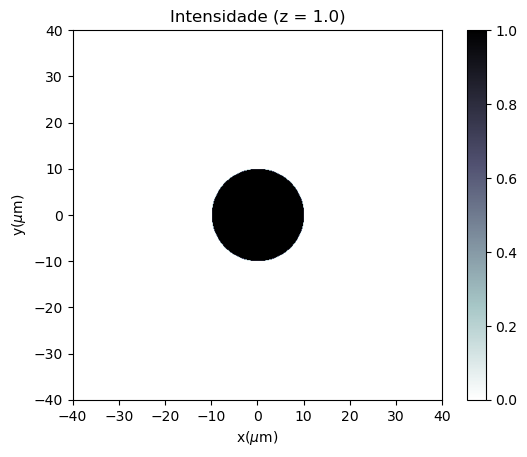

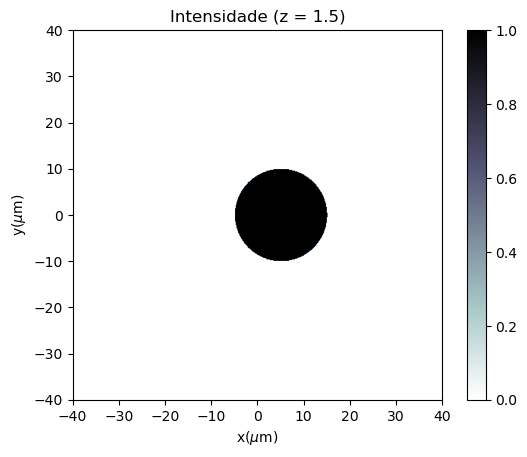

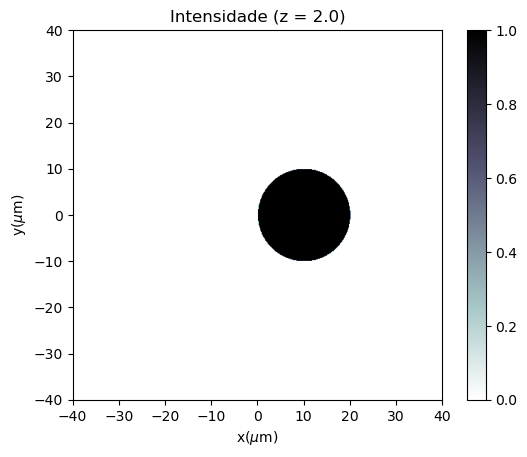

In [13]:
for z in Z:
    # criação de figuras para plotagem de imagem
    fig, ax = plt.subplots();

    # rotulação do título da figura
    ax.set_title(f'Intensidade (z = {z})');

    # rotulação dos eixos coordenados
    ax.set_xlabel('x($\mu$m)')
    ax.set_ylabel('y($\mu$m)')

    # geração de imagem do perfil do índice de refração ao longo do guia reto
    imageIntensity = ax.imshow(
        np.zeros(X.shape) +
        strghtWG.applyRefractiveIndex((X, Y), z),
        cmap = 'bone_r',                # define o mapa de cores
        extent = extremos               # define a extensão dos eixos x e y
    );
    fig.colorbar(imageIntensity);       # insere uma colorbar